In [12]:
import pandas as pd
df= pd.read_csv("data.csv")
df

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


In [2]:
bp_before=df[' Blood Pressure Before (mmHg)']
bp_after =  df[' Blood Pressure After (mmHg)']

mean_bp_before: 133.91
std_error_before: 0.6565203728750538
confidence_interval_before (132.6232200691649, 135.1967799308351) 

mean_bp_after 128.36
std_error_after 0.6853495458523338
confidence_interval_after (127.01671489012944, 129.7032851098706)


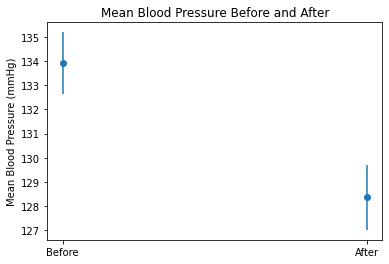

In [3]:
import matplotlib.pyplot as plt
import math
import numpy as np

# Mean and Confidence Interval for 'Blood Pressure Before'
mean_bp_before = sum(bp_before) / len(bp_before)
std_error_before = np.std(bp_before) / math.sqrt(len(bp_before))
confidence_interval_before = (mean_bp_before - 1.96 * std_error_before, mean_bp_before + 1.96 * std_error_before)
print('mean_bp_before:',mean_bp_before)
print('std_error_before:',std_error_before)
print('confidence_interval_before', confidence_interval_before,'\n')

# Mean and Confidence Interval for 'Blood Pressure After'
mean_bp_after = sum(bp_after) / len(bp_after)
std_error_after = np.std(bp_after) / math.sqrt(len(bp_after))
confidence_interval_after = (mean_bp_after - 1.96 * std_error_after, mean_bp_after + 1.96 * std_error_after)
print('mean_bp_after',mean_bp_after)
print('std_error_after',std_error_after)
print('confidence_interval_after',confidence_interval_after)

# Plotting the means and confidence intervals
plt.errorbar(['Before', 'After'], [mean_bp_before, mean_bp_after], yerr=[confidence_interval_before[1]-mean_bp_before, confidence_interval_after[1]-mean_bp_after], fmt='o')
plt.ylabel('Mean Blood Pressure (mmHg)')
plt.title('Mean Blood Pressure Before and After')
plt.show()

In [5]:
# Calculat the Mean Absolute Deviation (MAD)128.36
mad_before = np.mean(np.abs(bp_before - mean_bp_before))
mad_after = np.mean(np.abs(bp_after - mean_bp_after))

print('mad_before:', mad_before)
print('mad_after:', mad_after)

# Calculate the Standard Deviation
std_before = np.std(bp_before)
std_after = np.std(bp_after)

print('std_before:', std_before)
print('std_after:', std_after)

mad_before: 5.7118
mad_after: 5.9
std_before: 6.5652037287505385
std_after: 6.853495458523338


In [11]:
import numpy as np
from scipy.stats import t

# Calculate the correlation coefficient
correlation_coef = np.corrcoef(bp_before, bp_after)[0, 1]

# Check significance at 1% level
n = len(bp_before)
degrees_of_freedom = n - 2
t_critical = np.abs(t.ppf(0.01, degrees_of_freedom))
t_value = correlation_coef * np.sqrt((n - 2) / (1 - correlation_coef**2))

if np.abs(t_value) > t_critical:
    significance = "Significant correlation"
else:
    significance = "No significant correlation"
    
print('correlation_coef:', correlation_coef)
print('t_critical:', t_critical)    
print('t_value:', t_value) 
print('significance:', significance) 

correlation_coef: 0.9779485966556016
t_critical: 2.3650024101176554
t_value: 46.35573256849115
significance: Significant correlation
